In [1]:
import os
import numpy as np
import h5py

# import data.MPII.ref as ds

import matplotlib.pyplot as plt

In [2]:
# file=h5py.File("mytest.h5",'r')

In [3]:
# %matplotlib inline

# for number in range(91):
#     px,py=file['part'][number].T

#     img = plt.imread('data/MPII/images/'+file['imgname'][number].decode('UTF-8'))


#     fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
#     ax.imshow(img[:,:,::-1])
#     ax.scatter(px,py, s=10)

#     fig.savefig('../TFM/img/Video/Frame'+format(number, '02d')+'.png', bbox_inches='tight')   # save the figure to file
#     plt.close(fig)

In [1]:
# import cv2
# import numpy as np
# import glob

# img_array = []
# for filename in glob.glob('C:/Users/david/Desktop/TFM/img/Video/*.png'):
#     img = cv2.imread(filename)
#     height, width, layers = img.shape
#     size = (width,height)
#     img_array.append(img)

# out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 60, size)

# for i in range(len(img_array)):
#     out.write(img_array[i])
# out.release()

In [5]:
file = h5py.File("mytest.h5",'w')

In [6]:
start=722
end=812 #812

quantity=end-start+1

path0='../../../../TFM/CodeAndSimilars/Frames/batch_20210629_135041.trial_008/color/batch_20210629_135041.trial_008.color_00'
# path0='../../../../data/Frames/S2_20210629_Frames/batch_20210629_135041/batch_20210629_135041.trial_008/color/batch_20210629_135041.trial_008.color_00'
path1=np.arange(start,end+1,1).astype("str")
path2='.png'

aux=np.core.defchararray.add(path0,path1)
path=np.core.defchararray.add(aux,path2)
bpath=np.bytes_(path.tolist())

In [7]:
import pandas as pd

df=pd.read_csv("../TFM/CodeAndSimilars/Frames/Trajectory.txt", sep=" ")
aux=df.columns

auxdict={}
for i in range(len(aux)//2):
    auxdict[aux[1+2*i]]=aux[0+2*i][:-1]
    
traj=df.drop(aux[::2],axis=1).rename(columns=auxdict)
traj=traj.rename(index=traj["t"]).drop("t",axis=1)

traj1=traj.loc[2559:2559+1500]

In [8]:
pin=[traj1["x"].iloc[0],traj1["y"].iloc[0],1]
pfin=[215,75,1]
qin=[traj1["x2"].iloc[0],traj1["y2"].iloc[0],1]
qfin=[137,102,1]
rin=[traj1["x"].iloc[80],traj1["y"].iloc[80],1]
rfin=[236,64,1]

posin=np.array((pin,qin,rin)).T
posfin=np.array((pfin,qfin,rfin)).T
posin,posfin

M=np.matmul(posfin,np.linalg.inv(posin))

X=M[0][0]*traj1["x"]+M[0][1]*traj1["y"]+M[0][2]
Y=M[1][0]*traj1["x"]+M[1][1]*traj1["y"]+M[1][2]

traj2=traj1.drop(["x","y"],axis=1)
traj2["x"]=X
traj2["y"]=Y

X=M[0][0]*traj1["x2"]+M[0][1]*traj1["y2"]+M[0][2]
Y=M[1][0]*traj1["x2"]+M[1][1]*traj1["y2"]+M[1][2]

traj2=traj2.drop(["x2","y2"],axis=1)
traj2["x2"]=X
traj2["y2"]=Y

traj2["x"]=traj2["x"]-17
traj2["y"]=traj2["y"]+22

In [9]:
bodyparts=np.zeros((quantity,16,2))
bodyparts[:,10]=traj2[["x","y"]]
bodyparts[:,11]=traj2[["x2","y2"]]

In [10]:
file['center']=np.full((quantity,2),[156.,62.])

file['imgname']=bpath

file['index']=np.full(quantity,1,dtype="<i8")

file.create_dataset("name",(),h5py.string_dtype(encoding='utf-8'))

file.create_dataset("name_",(),"|S4")

file['normalize']=np.full(quantity,348/10)

file['part']=bodyparts

file['person']=np.full(quantity,0,dtype="<i8")

file['scale']=np.full(quantity,348/200)

file['torsoangle']=np.full(quantity,-5.194428907734817)

file['visible']=np.full((quantity,16),[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.])

In [11]:
key=file.keys()
key=list(key)
key

['center',
 'imgname',
 'index',
 'name',
 'name_',
 'normalize',
 'part',
 'person',
 'scale',
 'torsoangle',
 'visible']

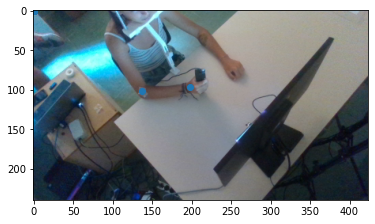

In [12]:
number=0
px,py=file[key[6]][number].T

img = plt.imread('data/MPII/images/'+file[key[1]][number].decode('UTF-8'))

%matplotlib inline
plt.imshow(img[:,:,::-1])
plt.scatter(px,py)
# plt.scatter(train_f[key[i]][number][0],train_f[key[i]][number][1])
# train_f[key[i]][number]

In [13]:
file.close()